In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [59]:
import pandas as pd
import numpy as np
from pmdarima.model_selection import train_test_split
from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA
from pmdarima.arima import VARMAX
from sklearn.metrics import mean_squared_error as metrics
from time import timer


ImportError: cannot import name 'VARMAX' from 'pmdarima.arima' (/usr/local/lib/python3.10/dist-packages/pmdarima/arima/__init__.py)

In [60]:
!pip install --upgrade pmdarima

In [43]:
df=pd.read_csv('/content/Busduct1_MFM_2024-02-07-18-59-40.csv')
df.head(50)

,Timestamp,BUSDUCT1 Current R,BUSDUCT1 Current Y,BUSDUCT1 Current B,BUSDUCT1 VOL RY,BUSDUCT1 VOL YB,BUSDUCT1 VOL BR,BUSDUCT1 KW,BUSDUCT1 PF
0,2023-03-11 14:45:00,25.089851,23.117828,27.809412,417.192963,419.108429,419.375885,NaN,76.029658
1,2023-03-11 15:00:00,20.480844,18.777246,23.783428,415.622589,417.509216,417.893982,NaN,76.077837
2,2023-03-11 15:15:00,35.334042,32.967422,40.695690,411.941101,413.911316,413.914825,NaN,76.750880
3,2023-03-11 15:30:00,33.526539,31.230062,37.576008,408.533417,410.693115,410.623932,NaN,75.674164
4,2023-03-11 15:45:00,23.486351,21.534044,25.824032,407.508392,409.861328,409.816833,NaN,79.324406
5,2023-03-11 16:00:00,33.834000,31.623861,35.864727,411.933807,414.037445,413.713562,NaN,74.986750
6,2023-03-11 16:15:00,24.045349,22.064682,26.001427,413.359039,415.112061,415.316254,NaN,74.755597
7,2023-03-11 16:30:00,26.759689,24.505220,29.065264,415.323303,417.272827,417.507416,NaN,74.004620
8,2023-03-11 16:45:00,30.607605,28.147034,32.631687,417.143616,418.934326,419.435760,NaN,73.603928
9,2023-03-11 17:00:00,16.935652,14.826841,19.354816,417.799103,419.662018,420.000061,NaN,82.723403


In [44]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [45]:
X = df[['BUSDUCT1 Current R',  'BUSDUCT1 Current Y', 'BUSDUCT1 Current B' ]]
train, test = X[0:-30], X[-30:]

In [46]:
df.columns

Index(['Timestamp', 'BUSDUCT1 Current R', 'BUSDUCT1 Current Y',
       'BUSDUCT1 Current B', 'BUSDUCT1 VOL RY', 'BUSDUCT1 VOL YB',
       'BUSDUCT1 VOL BR', 'BUSDUCT1 KW', 'BUSDUCT1 PF'],
      dtype='object')

In [47]:
import pandas as pd

# Split the data into training and testing sets
X = df[['BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B']]
train, test = X[0:-30], X[-30:]

# Calculate the difference for each column in the training set
train_diff = pd.DataFrame()
for col in train.columns:
    train_diff[col] = train[col].diff()

# Drop missing values
train_diff.dropna(inplace=True)

In [48]:
from pmdarima import auto_arima

In [57]:
!pip install pmdarima

In [ ]:
pq = []
for name, column in train_diff[[ 'BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B',  ]].iteritems():
    print(f'Searching order of p and q for : {name}')
    stepwise_model = auto_arima(train_diff[name],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))


AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [50]:
pq=[]
for name, column in train_diff[['BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B',]].items():
    print(f'Searching order of p and q for : {name}')
    stepwise_model = auto_arima(train_diff[name],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Searching order of p and q for : BUSDUCT1 Current R
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=207055.906, Time=2.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=207069.239, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=207056.027, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=207055.667, Time=0.90 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=207054.968, Time=1.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=207054.284, Time=17.09 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=207058.892, Time=3.81 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=207055.188, Time=8.71 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=207055.297, Time=1.86 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=206952.758, Time=7.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=207054.818, Time=0.98 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=207057.308, Time=1.86 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=207055.239, Time=0.81 sec
 ARIMA(3,0,2)(0,0,0)

In [51]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns:
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [ ]:
pq

[(2, 0, 1), (7, 0, 0), (0, 0, 0)]

In [61]:
df_results_moni = pd.DataFrame(columns=['p', 'q','RMSE Open','RMSE High','RMSE Low','RMSE Close'])
print('Grid Search Started')
start = timer()
for i in pq:
    if i[0]== 0 and i[2] ==0:
        pass
    else:
        print(f' Running for {i}')
        model = VARMAX(train_diff[[ 'BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B',    ]], order=(i[0],i[2])).fit( disp=False)
result = model.forecast(steps=30)
inv_res = inverse_diff(df[['BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B']], result)
Opensrmse = np.sqrt(metrics.mean_squared_error(test['BUSDUCT1 Current R'], inv_res['BUSDUCT1 Current R_1st_inv_diff']))
Highrmse = np.sqrt(metrics.mean_squared_error(test['BUSDUCT1 Current Y'], inv_res['BUSDUCT1 Current Y_1st_inv_diff']))
Lowrmse=np.sqrt(metrics.mean_squared_error(test['BUSDUCT1 Current B'],inv_res['BUSDUCT1 Current B_1st_inv_diff']))

df_results_moni.loc[len(df_results_moni)] = {'p': i[0], 'q': i[2], 'RMSE Open':Opensrmse,'RMSE High':Highrmse,'RMSE Low':Lowrmse}
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

Grid Search Started
 Running for (2, 0, 1)
 Running for (7, 0, 0)
 Total time taken to complete grid search in seconds: 853.790334719999


In [62]:
df_results_moni.sort_values(by = ['RMSE Open','RMSE High','RMSE Low','RMSE Close'] )

,p,q,RMSE Open,RMSE High,RMSE Low,RMSE Close
0,0,0,21.656941,23.847859,35.424786,NaN


In [66]:
model = VARMAX(train_diff[[ 'BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B',  ]], order=(0,2)).fit( disp=False)
result = model.forecast(steps = 30)


In [68]:
res = inverse_diff(df[['BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B' ]],result)
res

,BUSDUCT1 Current R,BUSDUCT1 Current Y,BUSDUCT1 Current B,BUSDUCT1 Current R_1st_inv_diff,BUSDUCT1 Current Y_1st_inv_diff,BUSDUCT1 Current B_1st_inv_diff
21781,-1.036268,-0.778785,-2.598632,6.710355,6.235504,8.812944
21782,0.424233,0.479112,0.152773,7.134588,6.714616,8.965717
21783,-0.000835,-0.003816,-0.002099,7.133753,6.710801,8.963618
21784,-0.000835,-0.003816,-0.002099,7.132918,6.706985,8.961520
21785,-0.000835,-0.003816,-0.002099,7.132082,6.703169,8.959421
21786,-0.000835,-0.003816,-0.002099,7.131247,6.699353,8.957322
21787,-0.000835,-0.003816,-0.002099,7.130412,6.695537,8.955224
21788,-0.000835,-0.003816,-0.002099,7.129577,6.691722,8.953125
21789,-0.000835,-0.003816,-0.002099,7.128742,6.687906,8.951026
21790,-0.000835,-0.003816,-0.002099,7.127906,6.684090,8.948927


In [70]:
for i in ['BUSDUCT1 Current R', 'BUSDUCT1 Current Y' ,'BUSDUCT1 Current B']:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for BUSDUCT1 Current R
Evaluation metric results:-
MSE is : 56.545441481176425
MAE is : 3.561262886473743
RMSE is : 7.519670304021076
MAPE is : 19.96491748972368
R2 is : -0.3059896010818046

Evaluation metric for BUSDUCT1 Current Y
Evaluation metric results:-
MSE is : 50.884240337829176
MAE is : 3.1580731535336137
RMSE is : 7.1333190267805335
MAPE is : 17.644869131314394
R2 is : -0.25839697435311537

Evaluation metric for BUSDUCT1 Current B
Evaluation metric results:-
MSE is : 67.98550044410108
MAE is : 5.047085857388828
RMSE is : 8.245332039651348
MAPE is : 28.464826210461062
R2 is : -0.6031623059752997



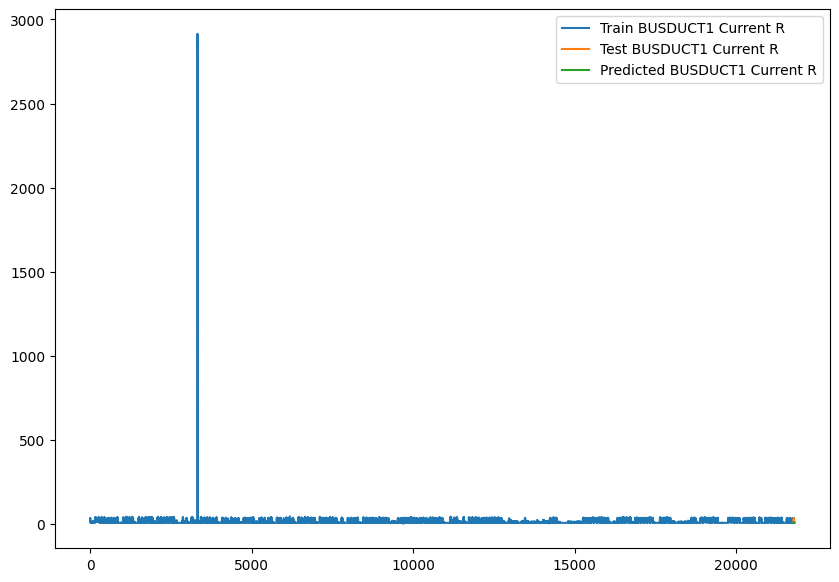

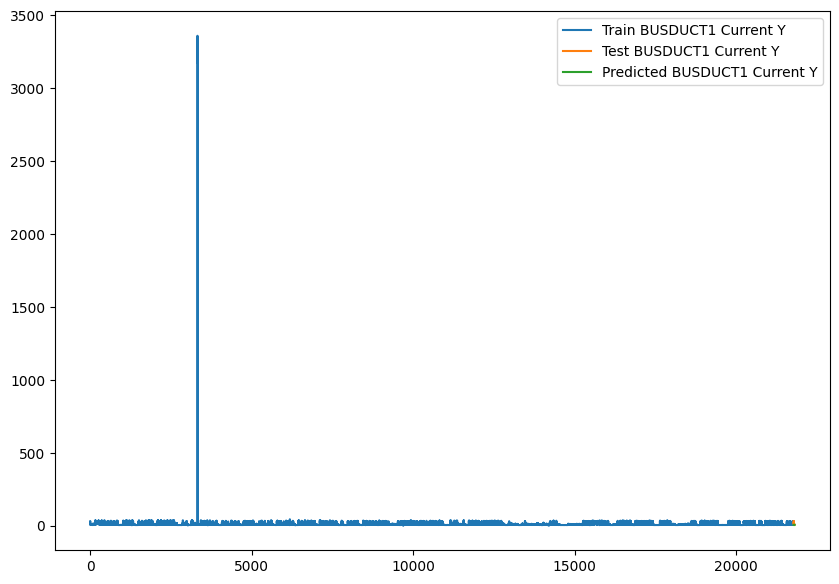

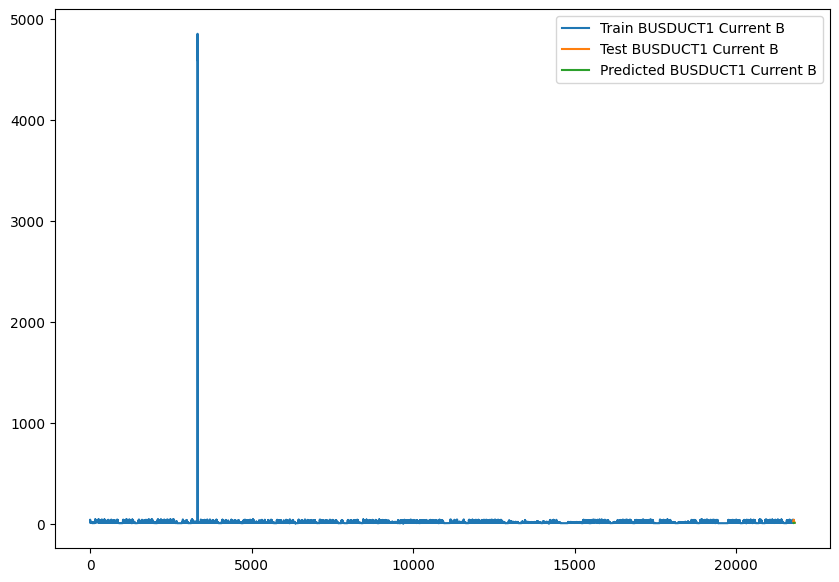

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B' ]:

    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

In [ ]:
df.columns

Index(['Timestamp', 'BUSDUCT1 Current R', 'BUSDUCT1 Current Y',
       'BUSDUCT1 Current B', 'BUSDUCT1 VOL RY', 'BUSDUCT1 VOL YB',
       'BUSDUCT1 VOL BR', 'BUSDUCT1 KW', 'BUSDUCT1 PF'],
      dtype='object')

In [ ]:
from sklearn.metrics import mean_squared_error